In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [4]:
data[data['Class']==1].describe()    # Describing the data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,1.0
std,47835.365138,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,...,3.869304,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291,256.683288,0.0
min,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0
25%,41241.500000,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,...,0.041787,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868,1.000000,1.0
50%,75568.500000,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,...,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,9.250000,1.0
75%,128483.000000,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,...,1.244611,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152,105.890000,1.0
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,...,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


In [5]:
# Scaling the Time and Amount features
data['Scaled_Amount'] = StandardScaler().fit_transform(data['Amount'].reshape(-1,1))
data['Scaled_Time'] = StandardScaler().fit_transform(data['Time'].reshape(-1,1))
data.drop(['Time', 'Amount'], axis=1, inplace=True)
data.head()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Scaled_Amount,Scaled_Time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


In [6]:
# Splitting the data into input features (X), and output target (Y)
X = data.iloc[:, data.columns != "Class"]
Y = data.iloc[:, data.columns == "Class"]

In [7]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Scaled_Amount,Scaled_Time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,-1.996541


In [8]:
Y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [9]:
# Splitting the training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=50)

In [10]:
# Decision Tree

clf= DecisionTreeClassifier()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

In [11]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85296
          1       0.77      0.75      0.76       147

avg / total       1.00      1.00      1.00     85443



In [12]:
matrix = confusion_matrix(y_test, pred)
print(matrix)

[[85263    33]
 [   37   110]]


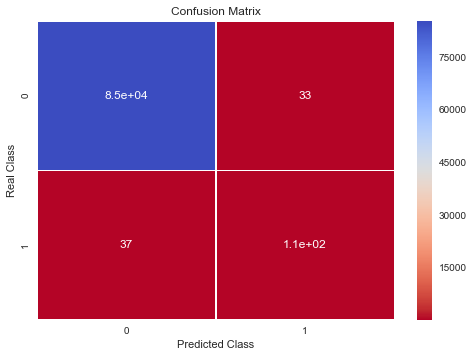

In [13]:
sns.heatmap(matrix, cmap="coolwarm_r", annot=True, linewidths=0.5)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Real Class")
plt.show()

In [14]:
# Calculating the Area Under the Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)

0.873956215857


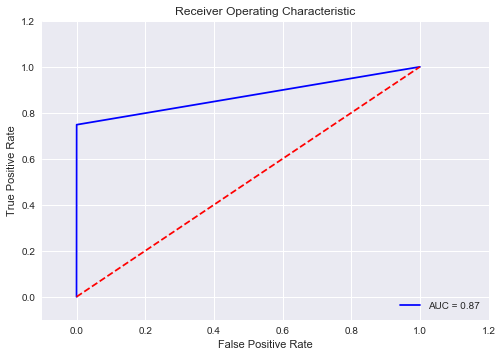

In [15]:
# Plotting the ROC Curve
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [16]:
# Finding the important features from the data
clf = RandomForestClassifier()
clf.fit(X, Y)
important_feat = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print(important_feat)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


V12              0.232211
V17              0.134455
V10              0.079222
V11              0.065108
V14              0.061785
V16              0.059303
V4               0.037646
V18              0.035645
V2               0.027694
V7               0.026931
V6               0.025375
V26              0.020516
V27              0.015083
V19              0.013601
V22              0.013320
V9               0.013244
V13              0.012488
V1               0.012209
V21              0.012078
Scaled_Time      0.011648
V3               0.011058
V20              0.010287
Scaled_Amount    0.010077
V8               0.009930
V28              0.009513
V15              0.009321
V5               0.008925
V25              0.007930
V23              0.007167
V24              0.006230
dtype: float64


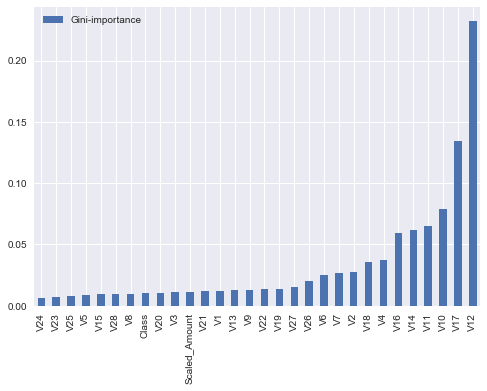

In [17]:
# Plotting the important features with respect to their importance
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(data.columns, clf.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=90)
plt.show()

In [18]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X[['V4','V9','V10','V11','V12','V14','V16','V17','V18']], Y, 
                                                    test_size=0.30, random_state=50)

In [19]:
X_train_new.head()

,V4,V9,V10,V11,V12,V14,V16,V17,V18
146142,-2.610136,0.267842,-0.934395,-1.008707,0.278703,0.238786,-0.518669,-0.578432,-0.848737
16983,-0.215224,-0.853811,-0.423586,-1.479606,0.593061,0.826582,0.360994,-0.159564,-0.075954
234010,1.650927,2.259568,-0.294023,-2.324652,1.185635,-1.521582,-0.074601,-0.348713,0.253053
128805,-0.136010,-0.495104,0.321087,-0.278972,-0.517043,-0.345351,1.549816,0.065207,-0.751909
75014,0.462234,-0.763078,-0.052042,1.611792,0.837880,0.623785,-0.507723,0.163926,-0.190041


In [20]:
y_train_new.head()

,Class
146142,0
16983,0
234010,0
128805,0
75014,0


In [21]:
clf_new= DecisionTreeClassifier()
clf_new.fit(X_train_new, y_train_new)
pred_new = clf_new.predict(X_test_new)

In [22]:
print(classification_report(y_test_new, pred_new))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85296
          1       0.76      0.79      0.78       147

avg / total       1.00      1.00      1.00     85443



In [23]:
matrix_new = confusion_matrix(y_test_new, pred_new)
print(matrix_new)

[[85260    36]
 [   31   116]]


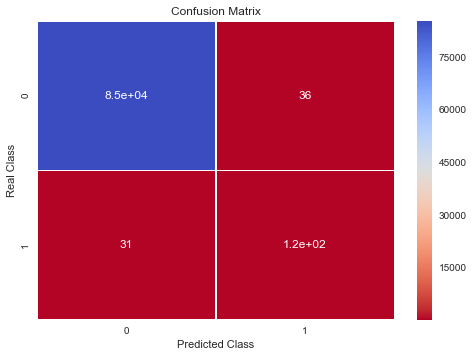

In [24]:
sns.heatmap(matrix_new, cmap="coolwarm_r", annot=True, linewidths=0.5)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Real Class")
plt.show()

In [25]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_new, pred_new)
roc_auc_lr_new = auc(false_positive_rate, true_positive_rate)
print (roc_auc_lr_new)

0.894346793304


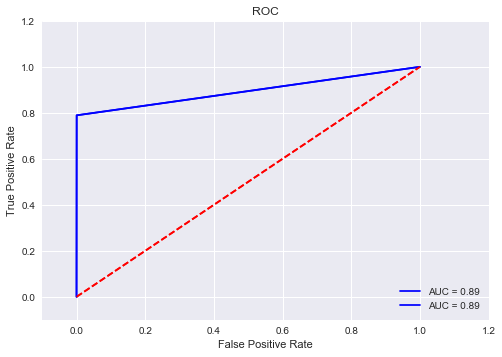

In [28]:
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc_lr_new)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [29]:
clf_new= RandomForestClassifier()
clf_new.fit(X_train_new, y_train_new)
pred_new = clf_new.predict(X_test_new)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [30]:
print(classification_report(y_test_new, pred_new))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85296
          1       0.93      0.77      0.84       147

avg / total       1.00      1.00      1.00     85443



In [31]:
matrix_new = confusion_matrix(y_test_new, pred_new)
print(matrix_new)

[[85287     9]
 [   34   113]]


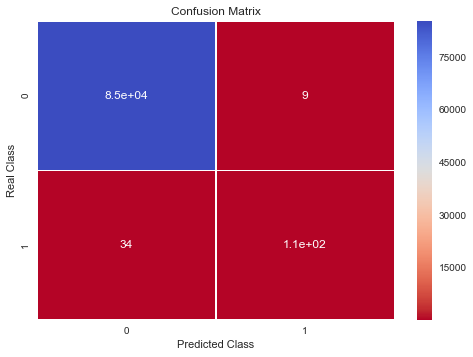

In [32]:
sns.heatmap(matrix_new, cmap="coolwarm_r", annot=True, linewidths=0.5)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Real Class")
plt.show()

In [33]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_new, pred_new)
roc_auc_lr_new = auc(false_positive_rate, true_positive_rate)
print (roc_auc_lr_new)

0.88430098404


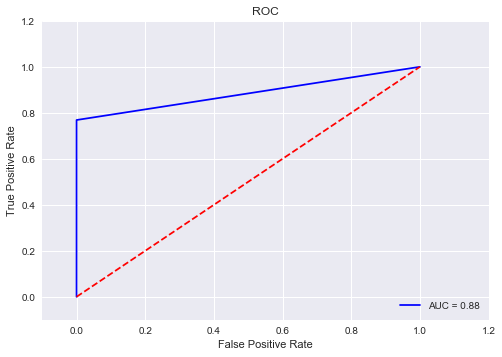

In [34]:
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc_lr_new)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()